In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
feature_id = 2

In [3]:
BASE_NAME = "/home/ubuntu/HeLa_20KInt-rt-4340-4580"
CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(BASE_NAME)
SUMMED_REGIONS_DATABASE = '{}/HeLa_20KInt-features-{}-{}.sqlite'.format(BASE_NAME, feature_id, feature_id)

In [4]:
# get the feature's base peak id
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
feature_list_df = pd.read_sql_query("select * from feature_list where feature_id={}".format(feature_id), db_conn)
db_conn.close()
if len(feature_list_df) > 0:
    base_peak_id = feature_list_df.iloc[0].base_peak_id.astype(int)
else:
    print("Empty feature list.")

In [5]:
base_peak_id

1

In [6]:
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
feature_isotopes_df = pd.read_sql_query("select * from feature_isotopes where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [7]:
feature_isotopes_df

,feature_id,feature_region_peak_id,centroid_scan,centroid_rt,centroid_mz,peak_summed_intensity
0,2,1,414.222428,4459.755071,878.405911,1877815
1,2,2,415.517356,4459.626480,877.904042,1377563
2,2,3,411.562298,4458.201791,878.907869,763282
3,2,4,414.436519,4454.566229,879.404220,166499
4,2,5,421.377772,4450.959669,879.902809,42703
5,2,6,420.812709,4450.997576,880.403773,18223


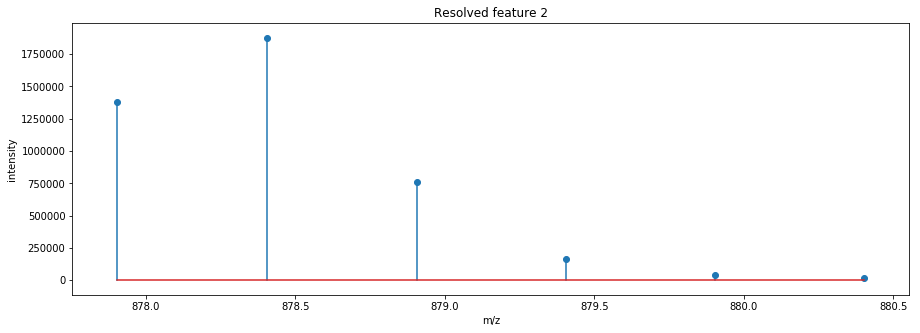

In [8]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(feature_isotopes_df.centroid_mz, feature_isotopes_df.peak_summed_intensity)
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.margins(0.06)
plt.title('Resolved feature {}'.format(feature_id))
plt.show()